<a href="https://colab.research.google.com/github/ANadjia/SocialMediaSentimentAnalyzer/blob/code/Arabic_deepL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ARABIC SENTIMENT ANALYSIS USING  DL***

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from keras.preprocessing import  sequence
from keras.models import Sequential
from keras.layers import Dense ,Dropout, Embedding,LSTM, Bidirectional,SpatialDropout1D
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam # - Works
import matplotlib.pyplot as plt 
import codecs
import re 
from sklearn.metrics import accuracy_score


In [2]:
from google.colab import drive
drive.mount('/content/drive/'  ,force_remount=True)

Mounted at /content/drive/


## Data importation

In [3]:

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/FinalData/Modif _300.csv').iloc[2:,:]
dataframe=x = data.sample(frac=1)

In [ ]:
#dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Modif _300.csv').iloc[2:,:]
#dataframe["class"] = np.where(dataframe["Class"] == "Positive",1,0)


In [4]:
dataframe.head()

,Unnamed: 0,Tweet,Class
3990,3991,صفحتك محترمه تحرجنا باسيله اجوبتها مقوده,0
9511,9512,مش عارف بصراحه الروايه ديه ازاي اترشحت للبوكر ...,0
44582,44369,فندق لطيف جدا ان قرات موقع حول الفندق كانت مفا...,1
28744,28531,اول وافضل شركات دونات اليمن وانا متفايل خير وم...,1
22134,22135,الفنين والعلاماء والمهنين هجرو ردايت المعيشه ف...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


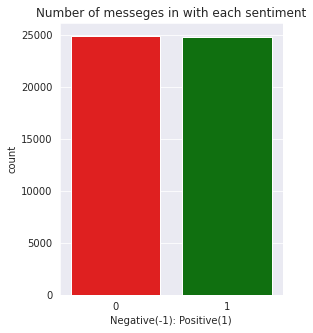

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(dataframe['Class'], palette=['red', 'green','pink'])
plt.title('Number of messeges in with each sentiment')
plt.xlabel("Negative(-1): Positive(1)")
plt.show()

In [6]:
import gensim
# load the AraVec model
model = gensim.models.Word2Vec.load("/content/drive/My Drive/Colab Notebooks/EmbeddingModels/full_grams_cbow_300_twitter.mdl")
#model = gensim.models.Word2Vec.load('full_grams_cbow_300_twitter.mdl')
print("We've",len(model.wv.index2word),"vocabularies")

We've 1476715 vocabularies


In [7]:
#dataframe["class"] = np.where(dataframe["class"] == "Positive",1,-1)
from sklearn.model_selection import train_test_split
#dataframe["class"] = np.where(dataframe["class"] == "Positive",1,-0)

X = dataframe['Tweet'].astype(str).values
y= dataframe['Class'].values
   
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=42, shuffle=True , stratify=y)

len(np.unique(y_train))

2

In [8]:
y_val[150:200]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1])

In [9]:
max_num_words=len(X_train)
print(max_num_words)

39732


In [12]:
# Identify max length of reviews
max_length = 0
for review_number in range(len(list_tokenized_train)):
  numberofwords=len(list_tokenized_train [review_number])
  if (numberofwords) > (max_length):
    max_length = numberofwords
print(max_length)

279


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
max_num_words = 39732

max_length =279
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(list(X_train))

list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_val)

list_tokenized_train[3]

[132,
 1560,
 17,
 20,
 1180,
 20186,
 161,
 3938,
 58,
 4425,
 1371,
 29828,
 15452,
 48,
 2810,
 68,
 18322,
 20,
 488,
 62,
 634,
 10731,
 7464,
 95,
 3862,
 688,
 2036]

In [14]:
import pickle
import pickle
with open('/content/drive/MyDrive/Colab Notebooks/ModelEss/tokenizer_data.pkl', 'wb') as handle:
    pickle.dump(
        {'tokenizer': tokenizer, 'num_words':max_num_words, 'maxlen':max_length}, handle)
    

   


In [15]:
X_tr = pad_sequences(list_tokenized_train, maxlen=max_length, padding='post')
X_tes = pad_sequences(list_tokenized_test, maxlen=max_length, padding='post')
X_tr[3]

array([  132,  1560,    17,    20,  1180, 20186,   161,  3938,    58,
        4425,  1371, 29828, 15452,    48,  2810,    68, 18322,    20,
         488,    62,   634, 10731,  7464,    95,  3862,   688,  2036,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [16]:
# Show the vocabulory
#define max_word :D
word_index = tokenizer.word_index
print(tokenizer.word_index)
print('Found %s unique tokens.' % len(word_index))
len(list_tokenized_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



39732

In [ ]:
word_index

{'علي': 1,
 'ان': 2,
 'جدا': 3,
 'الي': 4,
 'كان': 5,
 'الفندق': 6,
 'ا': 7,
 'كانت': 8,
 'او': 9,
 'انه': 10,
 'رايع': 11,
 'فندق': 12,
 'الكتاب': 13,
 'الروايه': 14,
 'حتي': 15,
 'الله': 16,
 'اكثر': 17,
 'اي': 18,
 'المطعم': 19,
 'مره': 20,
 'جيد': 21,
 'انا': 22,
 'الا': 23,
 'افضل': 24,
 'كنت': 25,
 'رايعه': 26,
 'اللي': 27,
 'الغرف': 28,
 'فقط': 29,
 'مكان': 30,
 'جميل': 31,
 'المكان': 32,
 'ممتاز': 33,
 'شيء': 34,
 'الغرفه': 35,
 'اذا': 36,
 'بشكل': 37,
 'كتاب': 38,
 'جيده': 39,
 'يوجد': 40,
 'اخري': 41,
 'الطعام': 42,
 'انها': 43,
 'قبل': 44,
 'مطعم': 45,
 'الفيلم': 46,
 'لقد': 47,
 'شي': 48,
 'وكان': 49,
 'روايه': 50,
 'يكون': 51,
 'ممتازه': 52,
 'للغايه': 53,
 'عندما': 54,
 'مش': 55,
 'الكاتب': 56,
 'جميله': 57,
 'خدمه': 58,
 'ايضا': 59,
 'الاستقبال': 60,
 'مثل': 61,
 'الخدمه': 62,
 'اخر': 63,
 'اني': 64,
 'انصح': 65,
 'يمكن': 66,
 'الكثير': 67,
 'بالنسبه': 68,
 'واحد': 69,
 'الاكل': 70,
 'ولم': 71,
 'يوم': 72,
 'العمل': 73,
 'اول': 74,
 'غرفه': 75,
 'احد': 76,
 'جد': 77,
 'ا

## Application of AraVec

In [17]:
unique_words = len(word_index)
total_words = unique_words+1
skipped_words = 0
embedding_dim = 300  
embedding_matrix = np.zeros((total_words, embedding_dim))
for word, index in tokenizer.word_index.items():
  try:
        embedding_vector = model[word]
  except:
    skipped_words = skipped_words+1
    pass
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector
print("Embeddings Matrix shape : ",embedding_matrix.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Embeddings Matrix shape :  (142151, 300)


## Test


In [ ]:
embedding_matrix[1000]-model.wv['والمطاعم']

array([ 1.4451102 ,  2.43636164,  2.7078833 ,  0.80040622,  0.70593694,
       -0.9804759 ,  0.28274806,  1.36552814, -1.11830908, -0.26506913,
        0.2685877 , -0.53906268,  1.47861022,  1.64139131, -0.46443833,
       -0.55000281, -0.92765272,  1.60251027, -0.7856926 ,  0.8073954 ,
        0.78108382,  1.37492852, -2.10157359,  1.01972157,  0.48168516,
       -1.21040463, -1.4243173 ,  0.14113954,  1.78154409,  0.76694822,
        0.37386176, -2.37623736,  0.92963668,  1.1878743 ,  0.58442879,
       -4.57547975, -0.84607837,  1.75921652,  0.46158278, -2.66065383,
       -0.07104796,  0.21865749, -2.38925624, -2.00417912, -0.18867189,
        1.03467466, -0.49496308, -1.80021676, -0.43717992,  1.05918795,
        1.13273394,  0.67350367, -1.12196538, -0.36412835, -2.65963024,
       -1.21907905, -0.80381556, -0.03517503,  1.20105395,  0.36689755,
       -0.10926723,  0.55148289,  1.45575979,  0.07953942, -1.53324923,
        0.68875635, -0.65055582,  3.50224757,  0.3641463 ,  2.21

In [18]:
from tensorflow.keras.layers import *
# create the embedding layer
embedding_layer = Embedding(total_words, embedding_dim, weights=[embedding_matrix], input_length=max_length)

In [19]:
from tensorflow.keras.layers import Embedding, LSTM,Conv1D,GlobalMaxPooling1D, MaxPooling1D,Dense,Bidirectional,Flatten## Neural networks layers 
from tensorflow.keras.models import Sequential

In [20]:

from tensorflow import keras
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD,RMSprop
opt = RMSprop(lr=0.001)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Model

In [69]:
model2=Sequential()
model2.add(embedding_layer ) 

model2.add(Bidirectional( LSTM(units=256,return_sequences=True)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(400, activation='relu'))
model2.add(Dropout(0.2))
#Output  Layer
model2.add(Dense(1, activation='sigmoid')) 


model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

print(model2.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 279, 300)          42645300  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 279, 512)          1140736   
_________________________________________________________________
dropout_2 (Dropout)          (None, 279, 512)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 142848)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               57139600  
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [22]:

history=model2.fit(X_tr, y_train,validation_data=(X_tes,y_val) ,epochs=5,batch_size=128)

Epoch 1/5
311/311 [==============================] - 71s 200ms/step - loss: 0.4620 - accuracy: 0.7992 - val_loss: 0.3919 - val_accuracy: 0.8233
Epoch 2/5
311/311 [==============================] - 61s 197ms/step - loss: 0.3005 - accuracy: 0.8718 - val_loss: 0.3727 - val_accuracy: 0.8443
Epoch 3/5
311/311 [==============================] - 61s 196ms/step - loss: 0.2130 - accuracy: 0.9108 - val_loss: 0.3894 - val_accuracy: 0.8464
Epoch 4/5
311/311 [==============================] - 61s 197ms/step - loss: 0.1520 - accuracy: 0.9378 - val_loss: 0.4943 - val_accuracy: 0.8463
Epoch 5/5
311/311 [==============================] - 61s 197ms/step - loss: 0.1062 - accuracy: 0.9558 - val_loss: 0.5808 - val_accuracy: 0.8395


In [23]:
"""from sklearn.metrics import classification_report

yPred = model2.predict(X_tes)
print(classification_report(y_val, yPred.argmax(axis=1)))
"""
from sklearn.metrics import classification_report , f1_score
y_test= model2.predict(X_tes)
y_test= np.round(y_test, 0)

print('\t\t\tPERFORMANCE\n')
print('Accuracy:', round(accuracy_score(y_val, y_test), 4), '\n')
print('recall', round(f1_score(y_val, y_test), 4), '\n')

print(classification_report(y_val, y_test))


			PERFORMANCE

Accuracy: 0.8395 

recall 0.8441 

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      4974
           1       0.82      0.87      0.84      4959

    accuracy                           0.84      9933
   macro avg       0.84      0.84      0.84      9933
weighted avg       0.84      0.84      0.84      9933



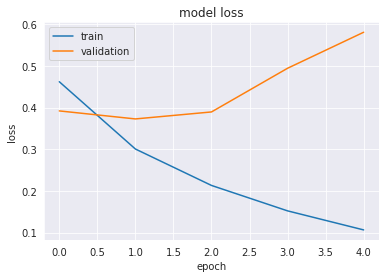

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



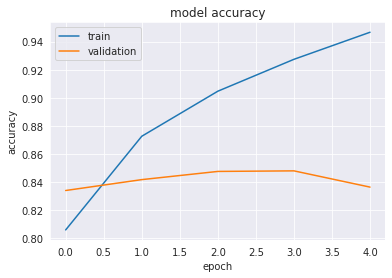

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **Final Test**

In [28]:
def predictionF(nombre):
      if (nombre>0.5) : return 'Positive'
      return 'Negative'


In [ ]:
def proc_padding(phrase):
    seq= tokenizer.texts_to_sequences(phrase)
    data= pad_sequences(seq1, maxlen= 281 , padding='post')
    return data

### Save Model

In [26]:
model2.save('/content/drive/MyDrive/Colab Notebooks/ModelEss/model_84.h5')

### Load Model

In [64]:
from tensorflow.keras.models import load_model
model_loaded=load_model('/content/drive/MyDrive/Colab Notebooks/ModelEss/model_281.h5')

In [30]:
phrase1 = ['منعودش نشري منتوج صفر']
phrase2=[' نتيا فور هايله بزاف']

seq1= tokenizer.texts_to_sequences(phrase1)
seq2= tokenizer.texts_to_sequences(phrase2)
data1 = pad_sequences(seq1, maxlen= 279 , padding='post')
data2 = pad_sequences(seq2, maxlen= 279 , padding='post')

prediction1=model_loaded.predict(data1)
prediction2=model_loaded.predict(data2)
print('Predection\n 1: ',predictionF(prediction1) ,'\n 2: ',predictionF(prediction2))


Predection
 1:  Negative 
 2:  Positive


In [65]:
import pandas as pd
nouv=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Ctest.csv').iloc[1:,:]
nouv.head()

,Unnamed: 0,tweet,class
1,1,لحاله مراهش قاع تعجب,NaN
2,2,فرحتلك تهنيت الحمد لله,NaN
3,3,هادي تافهه وقليله ادب,NaN
4,4,نتيا فور هايله بزاف,NaN
5,5,لبروف هداك نعمه الاخلاق وراسه معمر,NaN


In [67]:
with open("/content/drive/MyDrive/Colab Notebooks/ModelEss/tokenizer_data.pkl", 'rb') as f:
    data = pickle.load(f)
          

    tokenizer = data['tokenizer']
    num_words = data['num_words']
    maxlen = data['maxlen']


In [68]:
def predictionF(nombre):
      if (nombre>0.5) : return 'Positive'
      return 'Negative'

Text =nouv['tweet'].astype(str)
seq1= tokenizer.texts_to_sequences(Text)
data1 = pad_sequences(seq1, maxlen=maxlen, padding='post')

prediction1=model_loaded.predict(data1)
prediction1
nouv['class']=prediction1
nouv['class'] =nouv['class'].apply(predictionF)
nouv

#print('Predection\n 1: ',predictionF(prediction1) ,'\n 2: ',predictionF(prediction2))

ValueError: ignored

In [37]:
x
x

0                                    nan
1                   لحاله مراهش قاع تعجب
2                 فرحتلك تهنيت الحمد لله
3                  هادي تافهه وقليله ادب
4                    نتيا فور هايله بزاف
5     لبروف هداك نعمه الاخلاق وراسه معمر
6                    بلاد لخرا والميزريه
7           اللاعب كان لمخير فهاد الماتش
8                شا راكي حاسبه روحك نتيه
9             ليكول تاعنه جابت افضل معدل
10                 منعودش نشري منتوج صفر
Name: tweet, dtype: object

In [ ]:
from csv import DictReader
classif=[]
# iterate over each line as a ordered dictionary and print only few column by column name
with open('/content/drive/MyDrive/Colab Notebooks/Data/TestArab.csv', 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
       liste=(predictionF( model_loaded.predict(proc_padding(row['Tweet']))))
       classif.append(liste)
       print(liste)
       
        

NameError: ignored

In [ ]:
classif

['Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative']

In [ ]:
nouv["Tweet"]
classif
dict = {'Tweet': nouv["Tweet"], 'Sentiment': classif}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/TestArab_AfterPrediction.csv') 

In [ ]:
nouvTester=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/TestArab_AfterPrediction.csv')
nouvTester

,Unnamed: 0,Tweet,Sentiment
0,0,معني معني,Negative
1,1,اسوا قرات اجد حبكه او مغزي قمه الملل الحسنه ال...,Negative
2,2,احلي تخلف,Negative
3,3,الله يرحم والديك الشيخ حفيظ علي الكلام اكبر ال...,Negative
4,4,زرت فرع الخبر المطعم شكله مستهلك واللحم ماله طعم,Negative
5,5,ان اللون الرمادي محل الاعراب ياابيض يااسود علم...,Negative
6,6,ان كنت تحب ان تتسلي فدونك علي الرغم ان ه يعجبن...,Negative
7,7,مبهمه وغامضه تشدني ابدا ولم اشعر بالتشويق انهي...,Negative
8,8,كتاب يعبر الكاتبه وحالها بشكل شخصي جدا,Negative
